### Examining experiment: BrainScanner20160506_155051 from AML18_moving.hdf5 **

['Activity' 'ActivityFull' 'GreenRaw' 'Indices' 'Positions' 'Ratio'
 'RawActivity' 'RedRaw' 'Time' 'TimeFull' 'deconvolvedActivity'
 'derivActivity' 'ordering' 'orientation' 'valid']


**Behaviour**

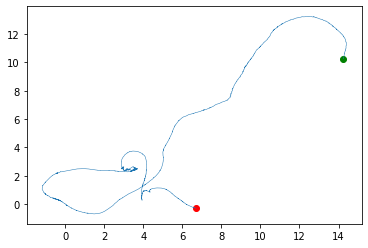

**Neuron positions**

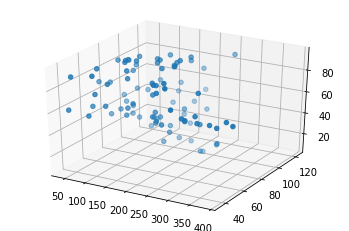

**Neuronal activity (selection)**

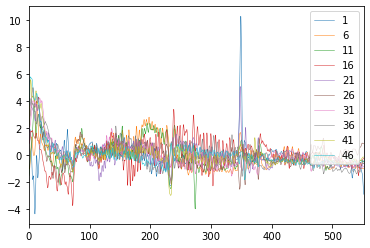

**Neuronal activity (all 95 neurons)**

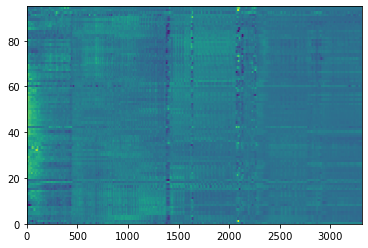

**Ethogram**

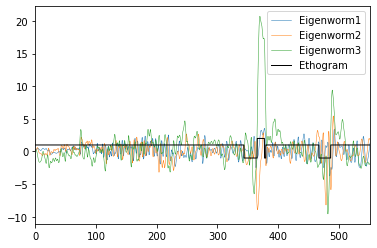

Written NWB file to ScholzEtAl2018.AML18_moving.BrainScanner20160506_155051.nwb


### Examining experiment: BrainScanner20160506_160928 from AML18_moving.hdf5 **

['Activity' 'ActivityFull' 'GreenRaw' 'Indices' 'Positions' 'Ratio'
 'RawActivity' 'RedRaw' 'Time' 'TimeFull' 'deconvolvedActivity'
 'derivActivity' 'ordering' 'orientation' 'valid']


**Behaviour**

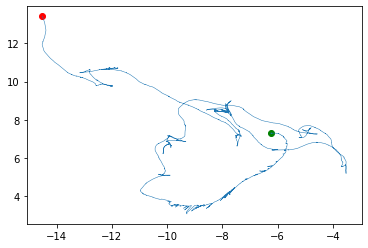

**Neuron positions**

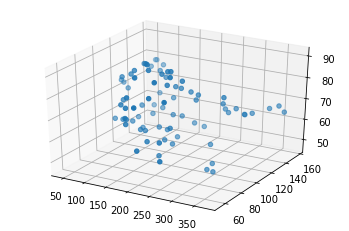

**Neuronal activity (selection)**

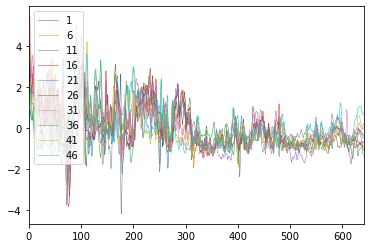

**Neuronal activity (all 83 neurons)**

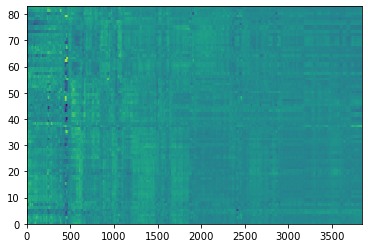

**Ethogram**

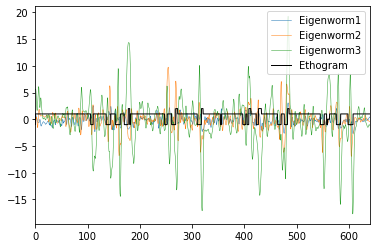

Written NWB file to ScholzEtAl2018.AML18_moving.BrainScanner20160506_160928.nwb


In [14]:
import h5py
import numpy as np
import pynwb
from hdmf.backends.hdf5.h5_utils import H5DataIO

from IPython.display import Markdown, display

import matplotlib.pyplot as plt
%matplotlib inline  

# Note: get data locally with:
#   wget https://osf.io/5298q/download -O AML18_moving.hdf5 
#   wget https://osf.io/sgnrh/download -O AML175_moving.hdf5 
filenames = ['AML18_moving.hdf5','AML175_moving.hdf5']
filenames = ['AML18_moving.hdf5']

for filename in filenames:

    celegans_h5 = h5py.File(filename, 'r')
    exps = np.array(celegans_h5['/'])
    for exp in exps:
        
        display(Markdown('### Examining experiment: %s from %s **'%(exp,filename)))
        ns = np.array(celegans_h5['/%s/Neurons'%exp])
        behas = np.array(celegans_h5['/%s/Behavior'%exp])
        #print behas
        print(ns)
        
        ###################################
        
        display(Markdown('**Behaviour**'))
        xs = np.array(celegans_h5['/%s/Behavior/X'%exp])
        ys = np.array(celegans_h5['/%s/Behavior/Y'%exp])
        
        fig = plt.figure()
        plt.plot([xs[0]], [ys[0]], lw=0, marker='o',color='green')
        plt.plot([xs[-1]], [ys[-1]], lw=0, marker='o',color='red')
        plt.plot(xs, ys, lw=.5)
        
        plt.show()
        
        ###################################
        
        display(Markdown('**Neuron positions**'))
        
        positions = np.array(celegans_h5['/%s/Neurons/Positions'%exp])
        #print positions
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ax.scatter(positions[0],positions[1],positions[2])
        ax.set_aspect('auto')
        plt.show()
        
        ###################################
        
        display(Markdown('**Neuronal activity (selection)**'))
        
        fig = plt.figure()
        activity = np.array(celegans_h5['/%s/Neurons/Activity'%exp])
        times = np.array(celegans_h5['/%s/Neurons/Time'%exp])
        #print len(times)

        for i in range(1, 50,5):
            plt.plot(times, activity[i], lw=.5, label='%s'%i)
            plt.xlim([times[0],times[-1]])

        plt.legend()
        plt.show()

        ###################################
        
        display(Markdown('**Neuronal activity (all %s neurons)**'%len(activity)))
        
        hm_fig, hm_ax = plt.subplots()
        hm_ax.pcolormesh(activity)
        plt.show()

        ###################################
        
        display(Markdown('**Ethogram**'))
        
        eth = 1*np.array(celegans_h5['/%s/Behavior/Ethogram'%exp])
        ethFull = np.array(celegans_h5['/%s/Behavior/EthogramFull'%exp])
        
        #print len(ethFull)
        #print len(eth)
        
        ew1 = np.array(celegans_h5['/%s/Behavior/Eigenworm1'%exp])
        ew2 = np.array(celegans_h5['/%s/Behavior/Eigenworm2'%exp])
        ew3 = np.array(celegans_h5['/%s/Behavior/Eigenworm3'%exp])
        
        fig = plt.figure()
        #plt.plot(ethFull, lw=1)
        plt.plot(times, ew1, lw=.5, label='Eigenworm1')
        plt.plot(times, ew2, lw=.5, label='Eigenworm2')
        plt.plot(times, ew3, lw=.5, label='Eigenworm3')
        plt.plot(times, eth, lw=1, color='k', label='Ethogram')
        plt.xlim([times[0],times[-1]])

        plt.legend()
        plt.show()
        
        ###################################
        
        from datetime import datetime
        from dateutil.tz import tzlocal
        start_time = datetime.now(tz=tzlocal())
        create_date = datetime.now(tz=tzlocal())
        
        main_ref = 'Scholz et al. 2018 dataset: %s taken from file %s'%(exp,filename)
        nwbfile = pynwb.NWBFile(main_ref, 
                      exp, 
                      start_time,
                      file_create_date=create_date,
                      notes='NWB file created with pynwb v%s'%pynwb.__version__,
                      experimenter='Monica Scholz',
                      experiment_description='Whole-brain neural recordings of freely moving C. elegans',
                      institution='Princeton University',
                      related_publications='Predicting natural behavior from whole-brain neural dynamics, Monika Scholz, Ashley N Linder, Francesco Randi, Anuj K Sharma, Xinwei Yu, Joshua W Shaevitz, Andrew M Leifer, bioRxiv 445643; doi: https://doi.org/10.1101/445643',
                      lab='Leifer lab, https://pni.princeton.edu/faculty/andrew-leifer')
        
            
        for i in range(len(activity)):
            comments='Extracted from file: %s'%filename
            data = activity[i]
            wrapped_data = H5DataIO(data=data, compression=True) 
            ref = '%s_%s'%('Activity', i)
            desc = 'Neuron: %s'%(i)
            #print('Adding: %s'%desc)
            ts_acq = pynwb.TimeSeries(ref, 
                                      wrapped_data, 
                                      'none', 
                                      timestamps=times,
                                      comments=comments,
                                      description=desc)
            nwbfile.add_acquisition(ts_acq)
      
        ss = pynwb.behavior.SpatialSeries(name='ss_2D', 
                            reference_frame='Zero is origin',
                            data=np.array([xs.T[0],ys.T[0]]).T,
                            timestamps=times,
                            comments='Worm behavior',
                            description='Path of worm')

        pos1 = pynwb.behavior.Position(spatial_series=ss, name='Tracked 2D position')

        nwbfile.add_acquisition(pos1)
        
        nwb_file_name = 'ScholzEtAl2018.%s.%s.nwb'%(filename.split('.')[0], exp)
        io = pynwb.NWBHDF5IO(nwb_file_name, mode='w')
        io.write(nwbfile)
        io.close()
        print("Written NWB file to %s"%nwb_file_name)
